In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2

import os
print(os.listdir("../content/drive/MyDrive/Food_dataset"))
import warnings
warnings.filterwarnings('ignore')
from random import shuffle
import skimage
import skimage.io
from pathlib import Path
from tqdm import tqdm
from skimage import transform
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import transform
from PIL import Image
import re
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics


['test', 'train', '.ipynb_checkpoints']


In [ ]:
train_cheesecake = "/content/drive/MyDrive/Food_dataset/train/cheesecake"
#train_cup_cakes= "/content/drive/MyDrive/Food_dataset/train/cup_cakes"
#train_hamburger= "/content/drive/MyDrive/Food_dataset/train/hamburger"
#train_pizza= "/content/drive/MyDrive/Food_dataset/train/pizza"
train_donuts= "/content/drive/MyDrive/Food_dataset/train/donuts"

test_cheesecake = "/content/drive/MyDrive/Food_dataset/test/cheesecake"
#test_cup_cakes= "/content/drive/MyDrive/Food_dataset/test/cup_cakes"
#test_hamburger= "/content/drive/MyDrive/Food_dataset/test/hamburger"
#test_pizza= "/content/drive/MyDrive/Food_dataset/test/pizza"
test_donuts= "/content/drive/MyDrive/Food_dataset/test/donuts"

image_size = 128


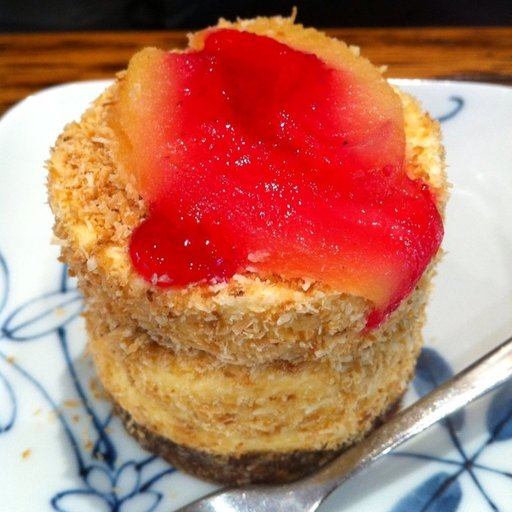

In [ ]:
Image.open("/content/drive/MyDrive/Food_dataset/train/cheesecake/1085860.jpg")

100%|██████████| 713/713 [00:04<00:00, 172.97it/s]


(-0.5, 127.5, 127.5, -0.5)

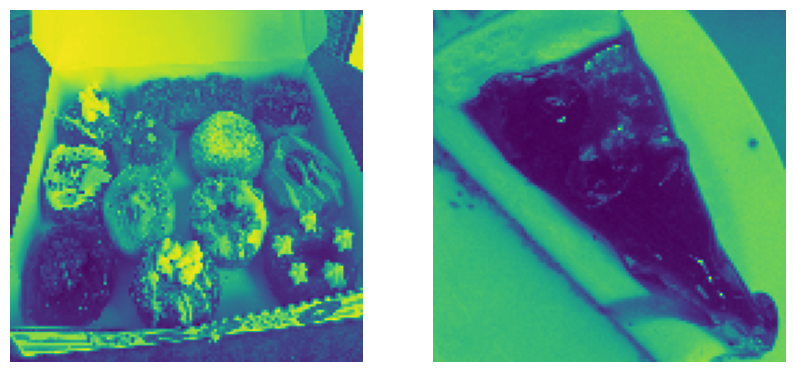

In [69]:
#for image in tqdm(os.listdir(pizza)):
    #path = os.path.join(pizza, image)
    #img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    #img = cv2.resize(img, (image_size, image_size)).flatten()
    #np_img=np.asarray(img)

#for image3 in tqdm(os.listdir(train_cup_cakes)):
    #path = os.path.join(train_cup_cakes, image3)
    #img3 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    #img3 = cv2.resize(img3, (image_size, image_size)).flatten()
    #np_img3=np.asarray(img3)

for image in tqdm(os.listdir(train_donuts)):
    path = os.path.join(train_donuts, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (image_size, image_size)).flatten()
    np_img=np.asarray(img)

#for image4 in tqdm(os.listdir(train_hamburger)):
    #img4 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    #img4 = cv2.resize(img4, (image_size, image_size)).flatten()
    #np_img4=np.asarray(img4)

for image2 in tqdm(os.listdir(train_cheesecake)):
    path = os.path.join(train_cheesecake, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2, (image_size, image_size)).flatten()
    np_img2=np.asarray(img2)


plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
#plt.subplot(1, 3, 3)
#plt.imshow(np_img3.reshape(image_size, image_size))
#plt.axis('off')
#plt.subplot(1, 5, 4)
#plt.imshow(np_img4.reshape(image_size, image_size))
#plt.axis('off')
#plt.subplot(1, 5, 5)
#plt.imshow(np_img2.reshape(image_size, image_size))
#plt.axis('off')
#plt.title("The Five classes in GrayScale")

In [ ]:
def train_data():
    train_data_cheesecake= []
    train_data_donuts=[]
    #train_data_cup_cakes=[]
    for image1 in tqdm(os.listdir(train_donuts)):
        path = os.path.join(train_donuts, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_donuts.append(img1)

    for image2 in tqdm(os.listdir(train_cheesecake)):
        path = os.path.join(train_cheesecake, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_cheesecake.append(img2)
    #for image2 in tqdm(os.listdir(train_cup_cakes)):
        #path = os.path.join(train_cup_cakes, image2)
        #img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        #img2 = cv2.resize(img2, (image_size, image_size))
        #train_data_cup_cakes.append(img2)

    #for image4 in tqdm(os.listdir(train_hamburger)):
        #path = os.path.join(train_hamburger, image4)
        #img4 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        #img4 = cv2.resize(img4, (image_size, image_size))
        #train_data_hamburger.append(img4)
    #for image5 in tqdm(os.listdir(train_pizza)):
        #path = os.path.join(train_pizza, image5)
        #img5 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        #img5 = cv2.resize(img5, (image_size, image_size))
        #train_data_pizza.append(img5)
    train_data= np.concatenate((np.asarray(train_data_donuts),np.asarray(train_data_cheesecake)),axis=0)
    return train_data

In [ ]:
def test_data():
    test_data_cheesecake = []
    test_data_donuts=[]
    #test_data_hamburger=[]
    #test_data_pizza=[]
    #test_data_cup_cakes=[]

    for image1 in tqdm(os.listdir(test_cheesecake)):
        path = os.path.join(test_cheesecake, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_cheesecake.append(img1)
    #for image2 in tqdm(os.listdir(test_cup_cakes)):
        #path = os.path.join(test_cup_cakes, image2)
        #img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        #img2 = cv2.resize(img2, (image_size, image_size))
        #test_data_cup_cakes.append(img2)
    for image2 in tqdm(os.listdir(test_donuts)):
        path = os.path.join(test_donuts, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_donuts.append(img2)
    #for image4 in tqdm(os.listdir(test_hamburger)):
        #path = os.path.join(test_hamburger, image4)
        #img4 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        #img4 = cv2.resize(img4, (image_size, image_size))
        #test_data_hamburger.append(img2)
    #for image5 in tqdm(os.listdir(test_pizza)):
        #path = os.path.join(test_pizza, image5)
        #img5 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        #img5 = cv2.resize(img5, (image_size, image_size))
        #test_data_pizza.append(img5)
    test_data= np.concatenate((np.asarray(test_data_cheesecake),np.asarray(test_data_donuts)),axis=0)
    return test_data

In [ ]:
train_data = train_data()
test_data = test_data()

100%|██████████| 300/300 [00:02<00:00, 146.49it/s]


In [ ]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [ ]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0).reshape(-1, 1)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0).reshape(-1, 1)

In [ ]:
y_data=np.concatenate((Y_train,Y_test),axis=0)

In [ ]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (2013, 128, 128)
Y shape:  (212, 1)


In [ ]:
from sklearn.model_selection import train_test_split

num_samples = min(x_data.shape[0], y_data.shape[0])
x_data_matched = x_data[:num_samples]
y_data_matched = y_data[:num_samples]

x_train, x_test, y_train, y_test = train_test_split(x_data_matched, y_data_matched, test_size=0.2, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [ ]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (169, 16384)
X test flatten (43, 16384)


In [ ]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 169)
x test:  (16384, 43)
y train:  (1, 169)
y test:  (1, 43)


In [ ]:
#This function initializes the weights w and bias b for the logistic regression
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

#This function calculates the sigmoid activation function for a given input z
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

#It takes the weight matrix w, bias b, training data x_train
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    #calculates the dot product of the weight matrix and training data
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    #computes the derivatives of the weight matrix w
    #and bias b with respect to the loss
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

#This function performs gradient descent
#to update the weight matrix w and bias b iteratively
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):

        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)

        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

#This function predicts the labels for the test data x_test
#using the trained weight matrix w and bias b
def predict(w,b,x_test):

    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# This is the main function that orchestrates the logistic regression process.
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

# LOSS Curve

Cost after iteration 0: nan
Cost after iteration 100: 3.722078
Cost after iteration 200: 2.375085
Cost after iteration 300: 1.649991
Cost after iteration 400: 0.264328
Cost after iteration 500: 0.170024
Cost after iteration 600: 0.094729
Cost after iteration 700: 0.071601
Cost after iteration 800: 0.059922
Cost after iteration 900: 0.052583
Cost after iteration 1000: 0.047380
Cost after iteration 1100: 0.043411
Cost after iteration 1200: 0.040232
Cost after iteration 1300: 0.037599
Cost after iteration 1400: 0.035365


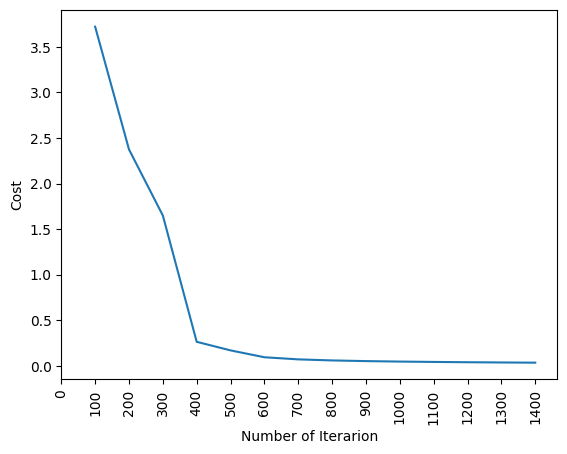

Test Accuracy: 60.47 %
Train Accuracy: 100.0 %


In [ ]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1500)

# Using LogisticRegression & GridSearch

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},
logistic_regression=LogisticRegression(random_state=42)
log_reg_cv=GridSearchCV(logistic_regression,grid,cv=10)
log_reg_cv.fit(x_train.T,y_train.T)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid=({'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2']},))

In [ ]:
print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)

best hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
accuracy:  0.5033088235294118


In [ ]:
log_reg= LogisticRegression(C=1,penalty="l1")
log_reg.fit(x_train.T,y_train.T)
print("test accuracy: {} ".format(log_reg.fit(x_test.T, y_test.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(log_reg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 1.0 
train accuracy: 1.0 


# **Confusion Matrix:**

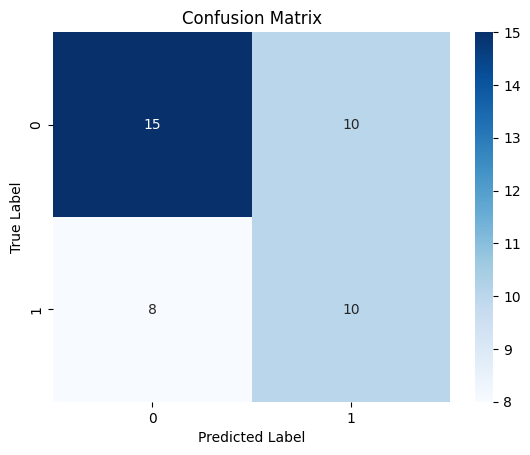

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the test set
y_pred_test = log_reg.predict(x_test.T)

# Compute the confusion matrix
cm = confusion_matrix(y_test.T, y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## **ROC Curve:**

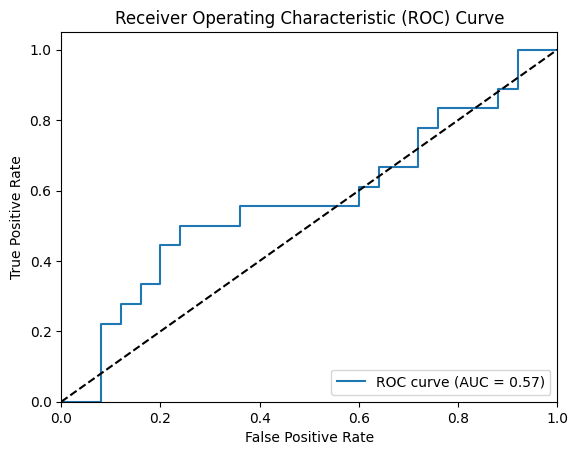

In [68]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred_prob = log_reg.predict_proba(x_test.T)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test.T, y_pred_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()